## Data Preprocessing

### 1. Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Importing the dataset

In [5]:
dataset = pd.read_csv('Data.csv')
print(dataset)


   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


### 3.Obtaining dependent and independent variables

### Getting independent variable

In [6]:

x = dataset.iloc[:, :-1].values


# iloc =locate indexes, : = range in python here it is : without upper n lower bound means all rows
# -1 means last column, left side means start from 0 as index in py starts from 0,
# in py includes lower bound n excludes upper bound


In [7]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


### Getting dependent variable

In [ ]:
y = dataset.iloc[:,-1].values

In [9]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


### 4. Handling of Missing Data

### Imputation of missing values--Here we impute the missing values, means decide them from the known part of the data.

###  For this we use the SimpleImputer class provides basic strategies for imputing missing values. 
### Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. 

In [6]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(x[:, 1:3])
imputer.transform(x[:, 1:3])
x[:, 1:3] = imputer.transform(x[:, 1:3])

In [7]:
print(x)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


### Encoding Categorical data

#### Encoding Independent variable

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct =  ColumnTransformer(transformers=[('encoder',OneHotEncoder(), [0])], remainder='passthrough')
x = np.array(ct.fit_transform(x))


In [10]:
print(x)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


#### Encoding Dependent variable

### This transformer should be used to encode target values, i.e. y, and not the input X.

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


### Splitting the dataset into Training  set and Test set

### Suppose, if we have given training to our machine learning model by a dataset and we test it by a completely different dataset. Then, it will create difficulties for our model to understand the correlations between the models.

### If we train our model very well and its training accuracy is also very high, but we provide a new dataset to it, then it will decrease the performance. So we always try to make a machine learning model which performs well with the training set and also with the test dataset. 

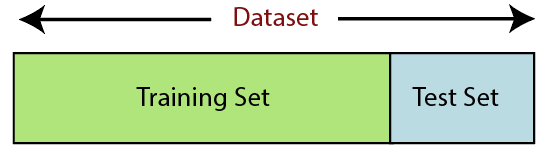

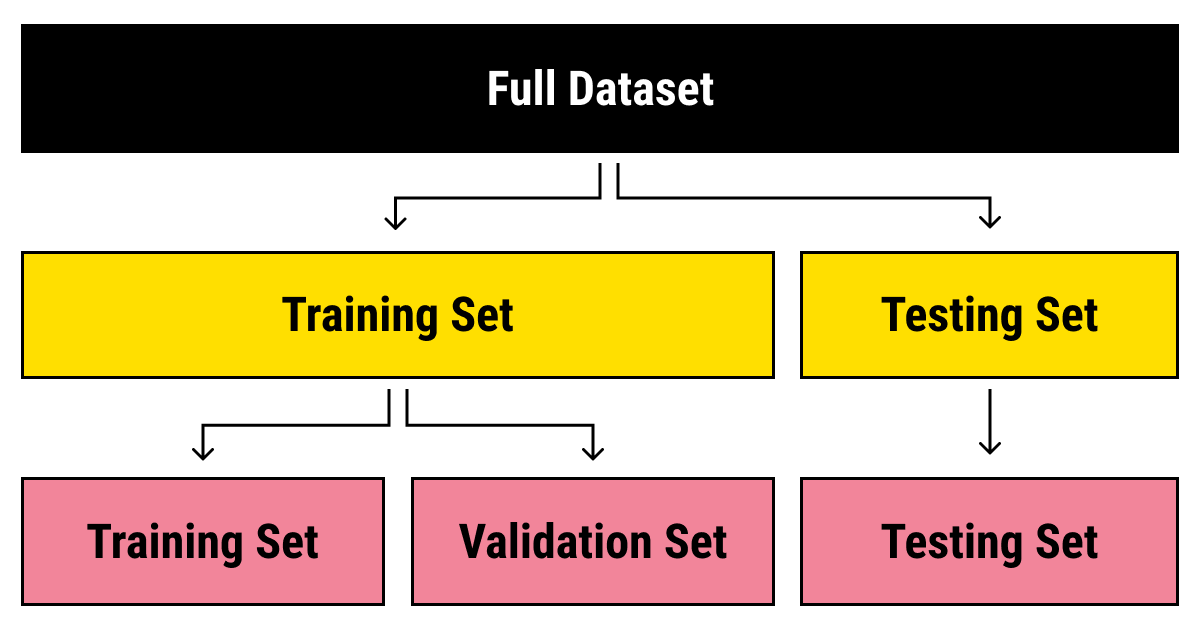

### Training Set: A subset of dataset to train the machine learning model, and we already know the output.

### Test set: A subset of dataset to test the machine learning model, and by using the test set, model predicts the output.

### 4 sets(2 pair) --matrix and features and dependent variable of training set ----matrix n features n dependent var of test set
### (x train,ytrain)==input,fit method , x test== inference/predictions,  y test

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =1)

In [14]:
print(x_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [15]:
print(x_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [16]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [17]:
print(y_test)

[0 1]
